In [26]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
from pmdarima import auto_arima

In [9]:
# Download stock data using yfinance
def load_data(ticker):
    data = yf.download(ticker, start="2023-01-01", end=pd.to_datetime('today'))
    data.reset_index(inplace=True)
    return data

In [29]:
# Plot raw stock data
def plot_raw_data(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], mode='lines', name='Stock Open', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Stock Close', line=dict(color='red')))
    fig.update_layout(title='Raw Stock Data', xaxis_title='Date', yaxis_title='Stock Price')
    fig.show()

In [32]:
# Forecast using pmdarima
def arima_forecast(data, n_years=1):
    df_train = data[['Date', 'Close']]
    df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

    model = auto_arima(df_train['y'], suppress_warnings=True, seasonal=True)
    forecast, conf_int = model.predict(n_periods=n_years*365, return_conf_int=True)

    future_dates = pd.date_range(start=df_train['ds'].max(), periods=n_years*365+1, freq='B')[1:]

    forecast_df = pd.DataFrame({'ds': future_dates, 'yhat': forecast, 'yhat_lower': conf_int[:, 0], 'yhat_upper': conf_int[:, 1]})

    return forecast_df

In [33]:
# Main script
user_ticker = input("Enter the stock symbol (e.g., AAPL): ").upper()
n_years = 1

Enter the stock symbol (e.g., AAPL):  aapl


In [34]:
# Load data
stock_data = load_data(user_ticker)

[*********************100%%**********************]  1 of 1 completed


In [35]:
# Set display options for stock_data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [36]:
# Display raw data
print(f"Raw Stock Data for {user_ticker}:")
print(stock_data.tail())

Raw Stock Data for AAPL:
          Date        Open        High         Low       Close   Adj Close  \
241 2023-12-18  196.089996  196.630005  194.389999  195.889999  195.889999   
242 2023-12-19  196.160004  196.949997  195.889999  196.940002  196.940002   
243 2023-12-20  196.899994  197.679993  194.830002  194.830002  194.830002   
244 2023-12-21  196.100006  197.080002  193.500000  194.679993  194.679993   
245 2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   

       Volume  
241  55751900  
242  40714100  
243  52242800  
244  46482500  
245  37122800  


In [37]:
# Reset display options to default
pd.set_option('display.max_rows', 10)  # Set the desired maximum number of rows

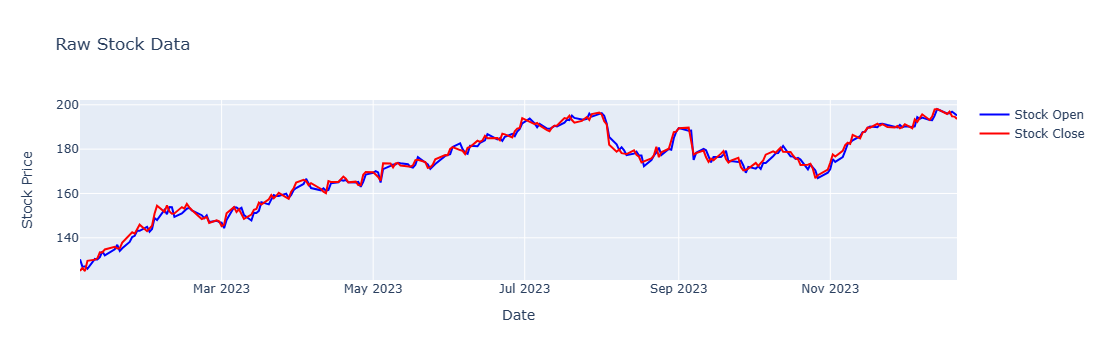

In [39]:
# Plot raw data
plot_raw_data(stock_data)

In [40]:
# Perform forecast using pmdarima
forecast = arima_forecast(stock_data, n_years)

In [41]:
# Set display options for forecast
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [42]:
# Display forecast data
print("\nForecast Data:")
print(forecast.tail())


Forecast Data:
            ds        yhat  yhat_lower  yhat_upper
606 2025-05-12  294.576873  215.164217  373.989528
607 2025-05-13  294.856587  215.334018  374.379156
608 2025-05-14  295.136301  215.503970  374.768633
609 2025-05-15  295.416016  215.674073  375.157958
610 2025-05-16  295.695730  215.844327  375.547133


In [43]:
# Reset display options to default
pd.set_option('display.max_rows', 10)  # Set the desired maximum number of rows

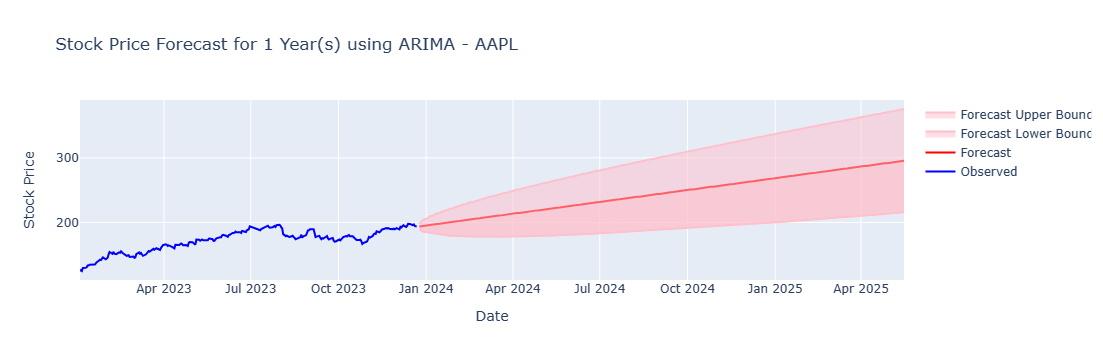

In [44]:
#plot graph 
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Observed', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='lines', name='Forecast Lower Bound', line=dict(color='pink')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='lines', name='Forecast Upper Bound', line=dict(color='pink')))
fig.update_layout(title=f'Stock Price Forecast for {n_years} Year(s) using ARIMA - {user_ticker}', xaxis_title='Date', yaxis_title='Stock Price')
fig.show()